### Importing Basic Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.f' % x)

### Loading Data

In [2]:
df = pd.read_csv('data.csv',encoding = 'latin1')
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1,Prado,2100000,Karachi,Cash,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,Karachi,Cash,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,Karachi,Cash,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,Karachi,Cash,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,Karachi,Cash,2013


### Data Exploration

In [3]:
df.shape

(24973, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


In [5]:
df.describe()

,KMs Driven,Price,Year
count,22687,24973,22689
mean,127811,912895,2006
std,599673,1537134,10
min,1,50000,1915
25%,16000,380000,2002
50%,66510,650000,2008
75%,100000,1145000,2013
max,10000000,87654321,2020


In [6]:
## Checking Null Values
df.isnull().sum()

Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64

In [7]:
## Droping duplicate values
df = df.drop_duplicates()
df.shape

(21199, 9)

In [8]:
df.isnull().sum()

Brand                434
Condition            433
Fuel                 699
KMs Driven           546
Model                702
Price                  0
Registered City     2740
Transaction Type     699
Year                 544
dtype: int64

In [9]:
## Droping Nan Values
df.dropna(inplace=True)
df.shape

(18456, 9)

- We drop duplicate and Nan values bcs our data size is big. It's sometime not good to drop nan values but after droping duplicates the Nan values are even less than 1 percent to the data. So we drop the Nan Values.

### Data Visualization

In [10]:
## Checking how many brands are there in the data
brand = df['Brand'].value_counts()
brand

Suzuki                8006
Toyota                4014
Honda                 2731
Daihatsu              1881
Nissan                 558
Mitsubishi             367
Hyundai                226
Other Brands           134
KIA                    118
Mercedes                79
Mazda                   77
FAW                     59
Daewoo                  59
Chevrolet               46
BMW                     25
Lexus                   19
Audi                    14
Subaru                  14
Classic & Antiques      13
Changan                  7
Range Rover              6
Porsche                  2
Land Rover               1
Name: Brand, dtype: int64

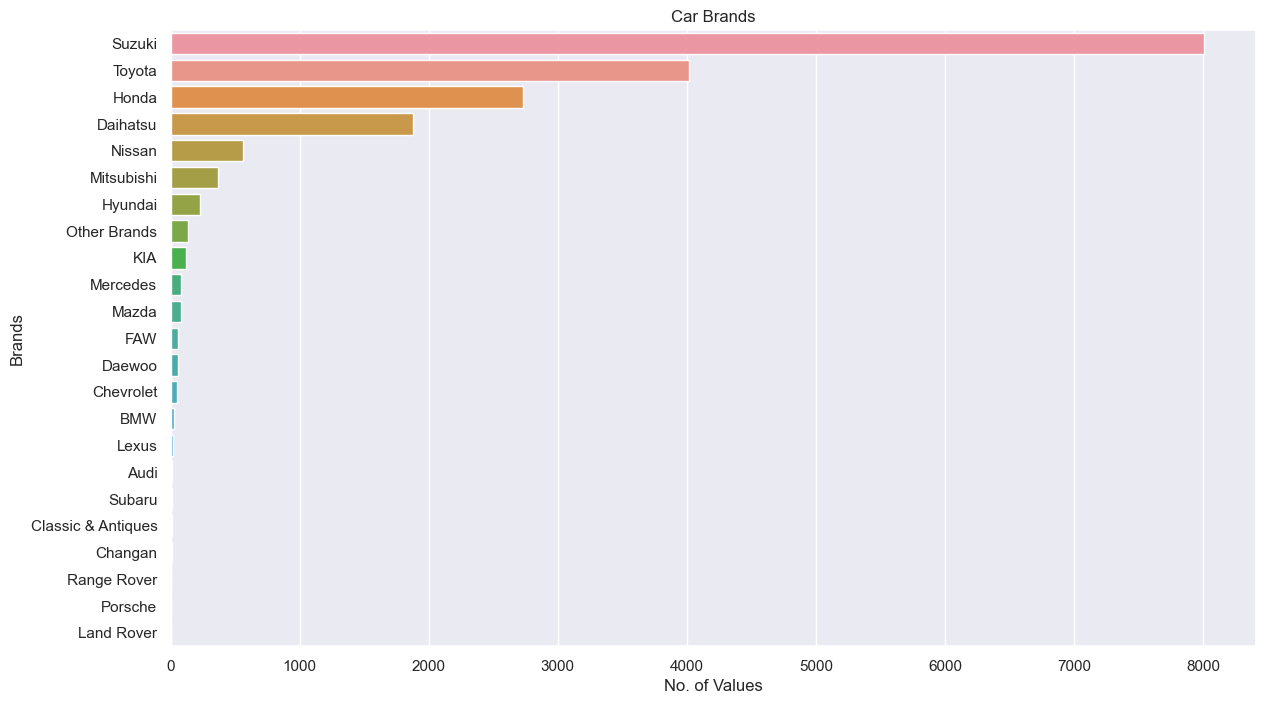

In [11]:
## Plotting a Bar-Chart
plt.figure(figsize=(14,8))
sns.barplot(x=brand.values,y=brand.index)
plt.title('Car Brands')
plt.xlabel('No. of Values')
plt.ylabel('Brands')
plt.show()

- So as we can see Suzuki is the most popular brand followed by Toyota and Honda.

In [12]:
## Checking Conditions column values
condition = df['Condition'].value_counts()
condition

Used    15389
New      3067
Name: Condition, dtype: int64

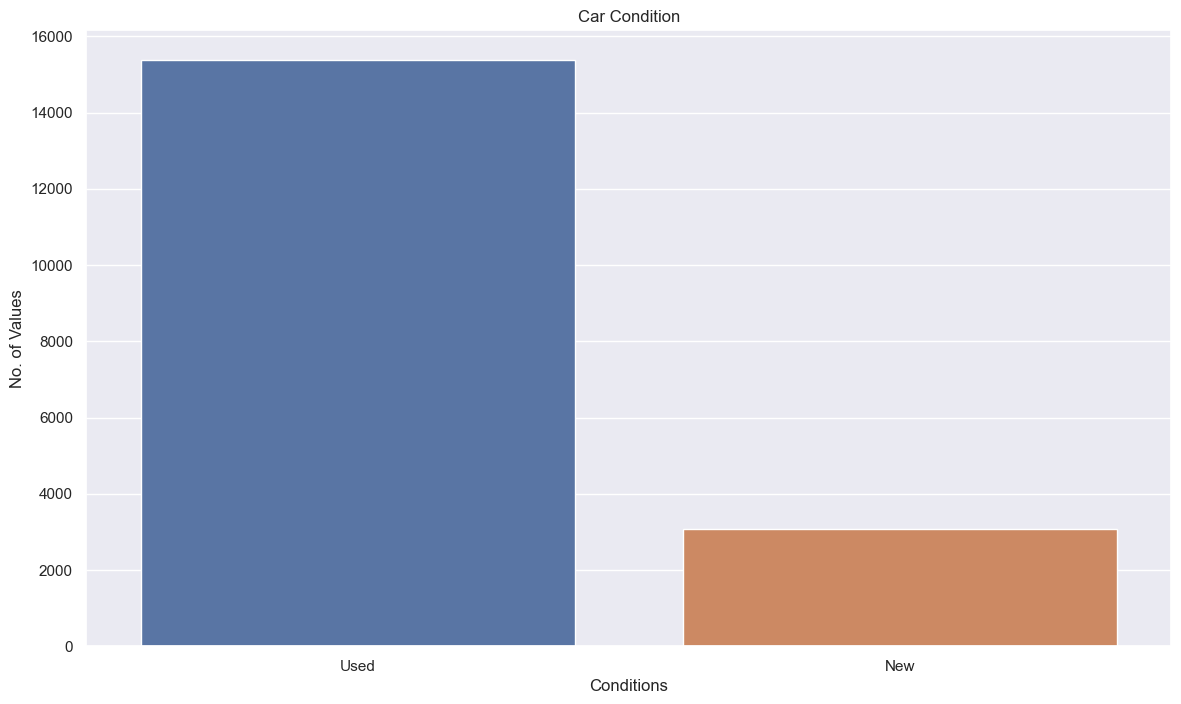

In [13]:
## Plotting a Bar-Chart
plt.figure(figsize=(14,8))
sns.barplot(x=condition.index,y=condition.values)
plt.title('Car Condition')
plt.ylabel('No. of Values')
plt.xlabel('Conditions')
plt.show()

- As Olx is used to sell "Used" Cars. So we can see clearly most of the cars are used. As for "New" Cars in this data i think it is misleading or the cars with very less "KMs Driven" are categorized into this category. 	

In [14]:
## Let's check Fuel Values
fuel = df['Fuel'].value_counts()
fuel

Petrol    11520
CNG        5875
Hybrid      656
Diesel      380
LPG          25
Name: Fuel, dtype: int64

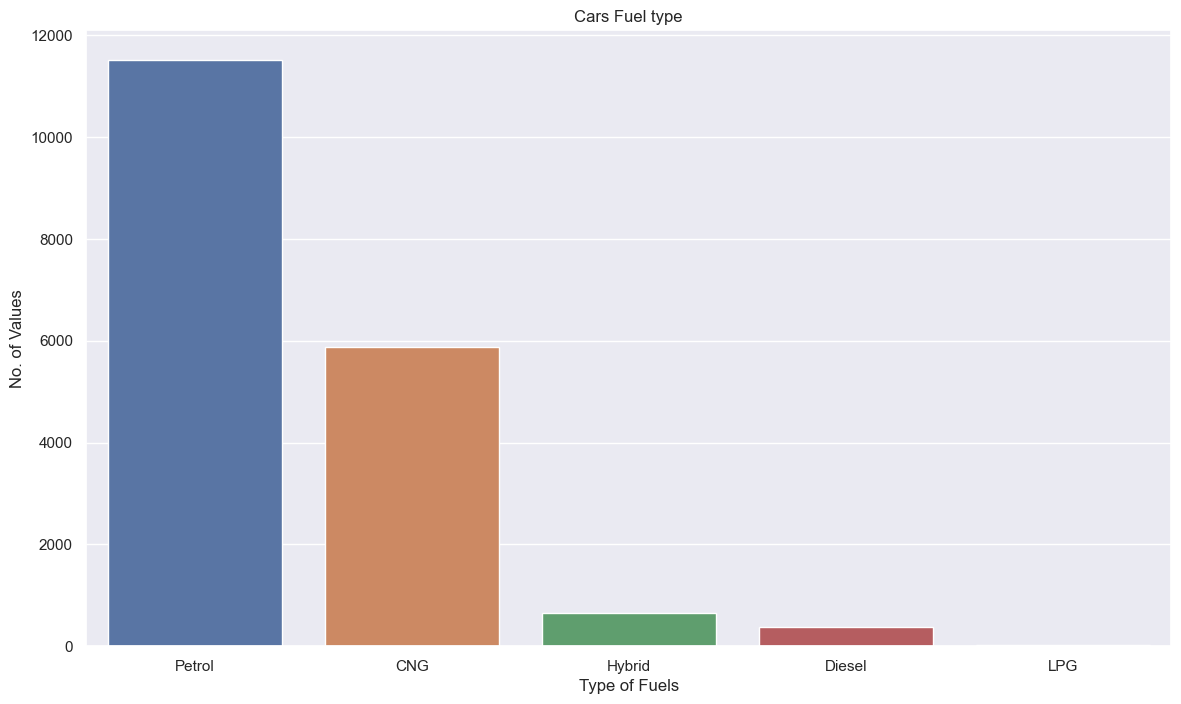

In [15]:
## Plotting a Bar-Chart
plt.figure(figsize=(14,8))
sns.barplot(x=fuel.index,y=fuel.values)
plt.title('Cars Fuel type')
plt.ylabel('No. of Values')
plt.xlabel('Type of Fuels')
plt.show()

- So Petrol and CNG are the top 2 Fuel types used in these Cars.

In [16]:
## Let's check models
model = df['Model'].value_counts()
model

Cultus VXR                   1529
Alto                         1376
Corolla GLI                   881
Mehran VX                     850
Other                         770
Mehran VXR                    686
Bolan                         597
Khyber                        567
Vitz                          491
Cuore                         467
Charade                       447
Corolla XLI                   444
Mira                          438
Civic EXi                     422
Civic VTi Oriel Prosmatec     369
City IVTEC                    340
Cultus VXL                    301
City IDSI                     294
Corrolla Altis                288
FX                            285
Swift                         277
Wagon R                       249
Hijet                         242
Margalla                      238
Civic Prosmetic               236
Passo                         229
Civic VTi                     205
Santro                        178
Baleno                        176
Corolla XE    

In [17]:
## Top 10 Car Models
model[:10]

Cultus VXR     1529
Alto           1376
Corolla GLI     881
Mehran VX       850
Other           770
Mehran VXR      686
Bolan           597
Khyber          567
Vitz            491
Cuore           467
Name: Model, dtype: int64

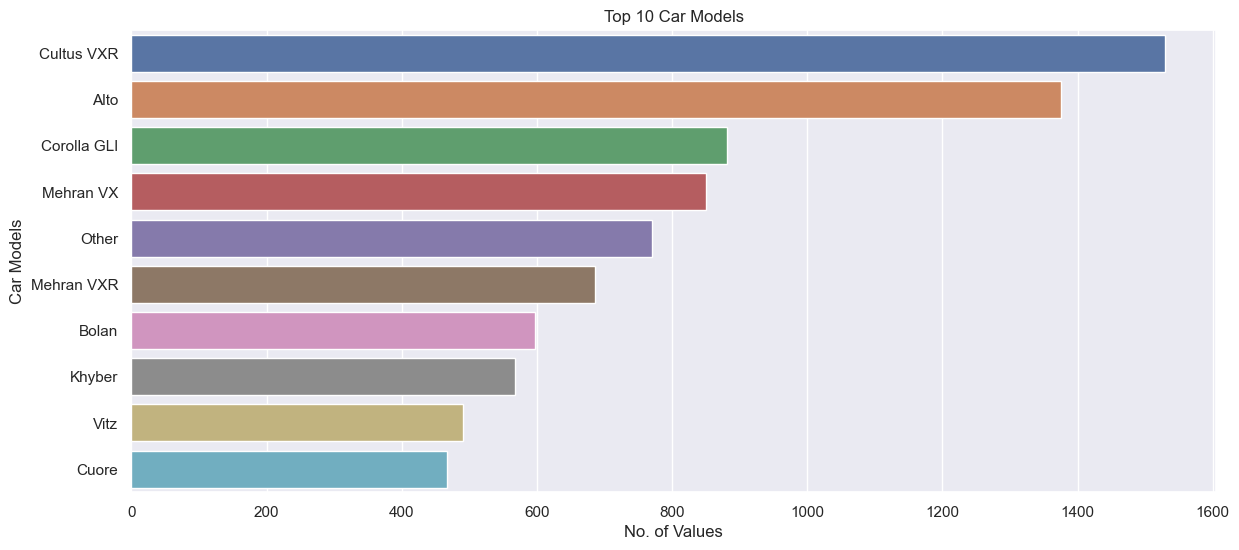

In [18]:
## Bar Chart for top 10 models
plt.figure(figsize=(14,6))
sns.barplot(x=model.values[:10],y=model.index[:10])
plt.title('Top 10 Car Models')
plt.xlabel('No. of Values')
plt.ylabel('Car Models')
plt.show()

- These are the top 10 car models at OLX. Cultus is the most popular model followed by Alto.

In [19]:
## Let's Check the most Registered City
city = df['Registered City'].value_counts()
city

Karachi             15464
Lahore               1603
Islamabad             781
Rawalpindi            120
Multan                 88
Faisalabad             79
Peshawar               45
Sialkot                31
Bahawalpur             26
Gujranwala             20
Hyderabad              19
Rahimyar Khan          11
Sargodha               11
Gujrat                 10
Quetta                 10
Abbottabad             10
Karak                   9
Kasur                   8
Lasbela                 7
Mardan                  6
Khanewal                6
Sukkur                  5
Attock                  5
Jhelum                  4
Bela                    4
Ali Masjid              4
Sahiwal                 4
Nowshera                4
Bagh                    3
Nawabshah               3
Khairpur                3
Bahawalnagar            3
Sukkar                  3
Vehari                  3
Khushab                 3
Mirpur                  3
Askoley                 3
Khanpur                 3
Okara       

In [20]:
## Top 10 Cities
city[:10]

Karachi       15464
Lahore         1603
Islamabad       781
Rawalpindi      120
Multan           88
Faisalabad       79
Peshawar         45
Sialkot          31
Bahawalpur       26
Gujranwala       20
Name: Registered City, dtype: int64

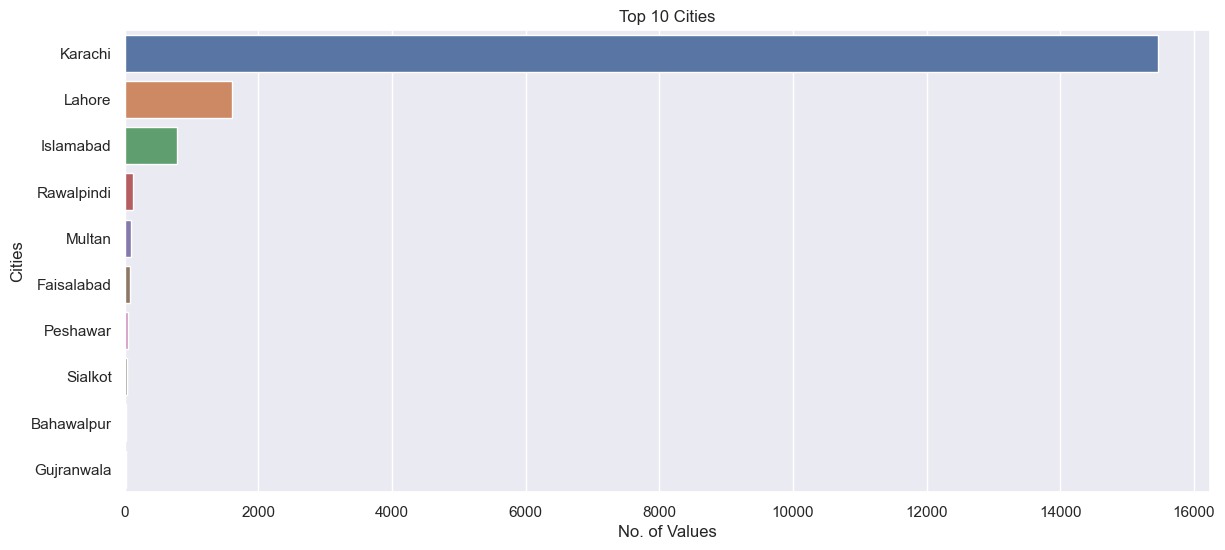

In [21]:
## Bar Chart for top 10 cities
plt.figure(figsize=(14,6))
sns.barplot(x=city.values[:10],y=city.index[:10])
plt.title('Top 10 Cities')
plt.xlabel('No. of Values')
plt.ylabel('Cities')
plt.show()

- So Karachi is the most registered city followed by Lahore and Islamabad

In [22]:
## Let's Check the Transaction Type
t_type = df['Transaction Type'].value_counts()
t_type

Cash                   17644
Installment/Leasing      812
Name: Transaction Type, dtype: int64

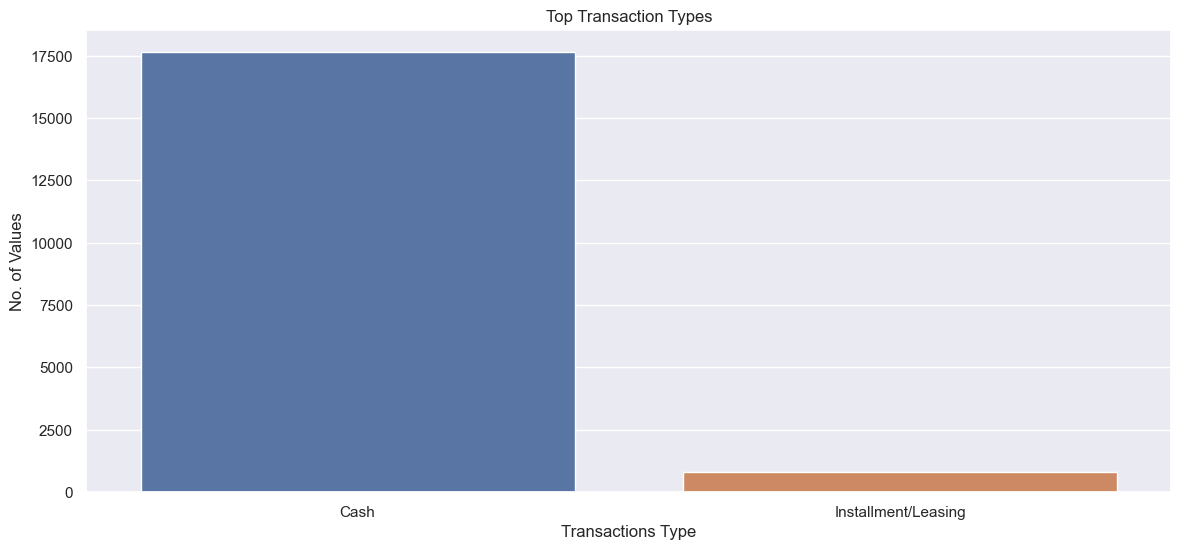

In [23]:
## Bar Chart for Transactions Type
plt.figure(figsize=(14,6))
sns.barplot(x=t_type.index,y=t_type.values)
plt.title('Top Transaction Types')
plt.xlabel('Transactions Type')
plt.ylabel('No. of Values')
plt.show()

In [24]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1,Prado,2100000,Karachi,Cash,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,Karachi,Cash,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,Karachi,Cash,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,Karachi,Cash,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,Karachi,Cash,2013


In [25]:
## Let's change the type of Year Column
df['Year'] = df['Year'].astype(int)
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1,Prado,2100000,Karachi,Cash,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,Karachi,Cash,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,Karachi,Cash,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,Karachi,Cash,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,Karachi,Cash,2013


In [26]:
## Let's Check the No. of cars models per year
model_per_year = df.groupby(['Year'])['Brand'].count().sort_values(ascending=False)
model_per_year

Year
2007    1225
2006    1168
2014     952
2012     933
2005     929
2010     908
2008     905
2011     879
2013     875
2015     830
2004     734
2018     727
2017     639
2009     611
2016     573
2003     506
1986     347
2002     329
2001     292
1993     290
1996     282
1998     281
2000     274
1984     262
1997     260
1995     252
1992     240
1999     231
1994     216
1988     210
1991     204
1990     201
1987     192
1989     184
1985     161
1983      72
1982      71
1974      40
1981      37
1980      31
1979      18
1976      10
1973       9
1978       8
1977       7
1972       6
1970       6
1969       6
1975       5
1971       5
1952       4
2020       2
1967       2
1963       2
1951       2
1943       2
1925       1
1968       1
1965       1
1964       1
1962       1
1960       1
1956       1
2019       1
1915       1
Name: Brand, dtype: int64

In [27]:
## Top 10 years
model_per_year.iloc[:10]

Year
2007    1225
2006    1168
2014     952
2012     933
2005     929
2010     908
2008     905
2011     879
2013     875
2015     830
Name: Brand, dtype: int64

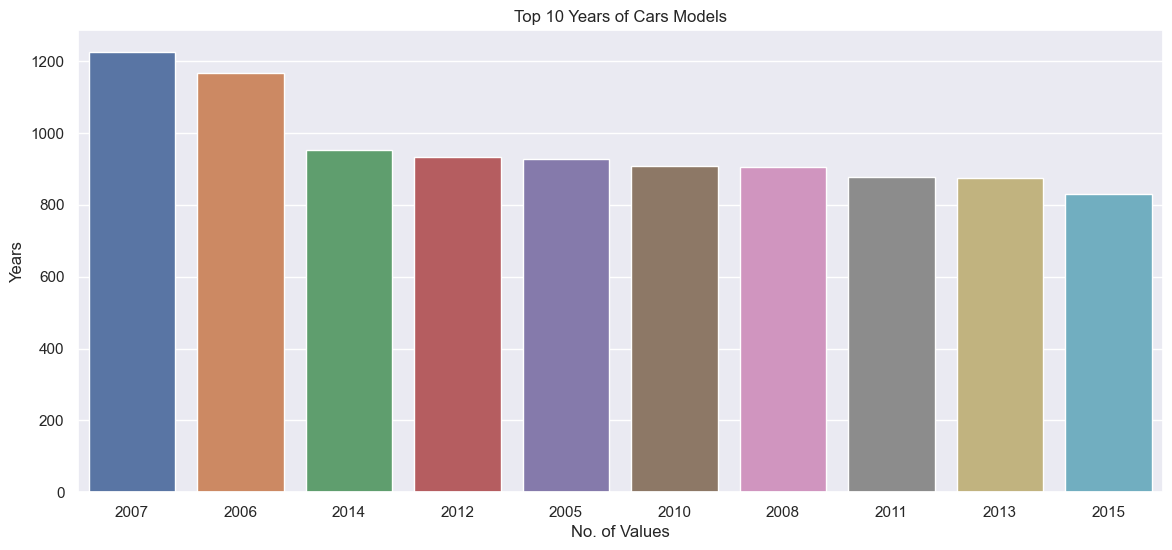

In [28]:
## Bar Chart for top 10 car models year
plt.figure(figsize=(14,6))
sns.barplot(x=model_per_year.index[:10],y=model_per_year.values[:10],order=model_per_year.index[:10])
plt.title('Top 10 Years of Cars Models')
plt.xlabel('No. of Values')
plt.ylabel('Years')
plt.show()

- So there are most of the cars of year 2007 followed by 2006 and then 2014.

In [29]:
## Mean Price of Each Brand Based of Cities
df.groupby(['Registered City','Brand'])['Price'].mean().to_frame()

Price
Registered City  Brand                      
Abbottabad       Daewoo               350000
                 Daihatsu            1522500
                 Nissan               420000
                 Other Brands       12331231
                 Suzuki               590000
                 Toyota              1160000
Ali Masjid       Honda                725000
                 Mazda               1125000
                 Nissan               850000
                 Suzuki               100000
Askoley          Suzuki               370000
Attock           Audi                 100000
                 BMW                15000000
                 Daihatsu             845000
                 Honda               1500000
                 Suzuki               180000
Badin            Suzuki               305000
                 Toyota               620000
Bagh             Honda               1350000
                 Suzuki               835000
                 Toyota               850000
Bahawalnagar     Suzuki               386667
Bahawalpur       Daihatsu             600000
                 Honda                300000
                 KIA                  199000
                 Mazda                600000
                 Other Brands         280000
                 Suzuki               444667
                 Toyota              1816667
Bela             Lexus                890000
                 Nissan              1500000
                 Suzuki               390000
                 Toyota               975000
Bhimber          Honda               1850000
                 Toyota              1490000
Burewala         KIA                10000000
Chilas           Suzuki              1250000
Chiniot          Suzuki               180000
Chitral          Suzuki               195000
Dera Ghazi Khan  Suzuki               355000
Dera Ismail Khan Suzuki               402000
Faisalabad       Daihatsu             370857
                 Honda                852222
                 Hyundai              482143
                 KIA                  312500
                 Mitsubishi           525000
                 Nissan               716250
                 Other Brands         150000
                 Suzuki               387653
                 Toyota               880833
Gujranwala       Honda                280000
                 Mitsubishi           630000
                 Suzuki               462500
                 Toyota               666667
Gujrat           Daihatsu             180000
                 FAW                  187000
                 Honda               1500000
                 KIA                  350000
                 Mitsubishi           310000
                 Suzuki               286667
                 Toyota               599000
Haripur          Suzuki               380000
Hyderabad        Daihatsu             250000
                 Honda               1700000
                 Suzuki               546786
                 Toyota              1401667
Islamabad        Audi                2550000
                 BMW                 1600000
                 Classic & Antiques   599500
                 Daewoo               341400
                 Daihatsu             888385
                 FAW                  912500
                 Honda               1593286
                 Hyundai              422500
                 KIA                  610000
                 Land Rover           228000
                 Lexus               2325000
                 Mazda                962500
                 Mercedes            2466250
                 Mitsubishi          1026176
                 Nissan               820450
                 Other Brands         612500
                 Range Rover        12500000
                 Subaru               366056
                 Suzuki               750389
                 Toyota              2133184
Jhelum           Suzuki               512500
                 Toyota           

In [30]:
## Price of Each Model of Car Based of Cities
df.groupby(['Registered City','Model'])['Price'].mean().to_frame()

Price
Registered City  Model                             
Abbottabad       Bolan                       270000
                 Corolla Assista            1160000
                 Mehran VX                   550000
                 Mehran VXR                  450000
                 Mira                       1522500
                 Other                     12331231
                 Racer                       350000
                 Sunny                       420000
                 Wagon R                    1090000
Ali Masjid       Blue Bird                   850000
                 Civic EXi                   725000
                 Flair                      1125000
                 Khyber                      100000
Askoley          Bolan                       290000
                 Carry                       300000
                 Other                       520000
Attock           7 Series                  15000000
                 A1                          100000
                 City IDSI                  1500000
                 Hijet                       845000
                 Mehran VX                   180000
Badin            Auris                       620000
                 Khyber                      250000
                 Kizashi                     360000
Bagh             Civic VTi Oriel Prosmatec  1350000
                 Corolla GLI                 850000
                 Every Wagon                 835000
Bahawalnagar     Cultus VXL                  580000
                 Margalla                    430000
                 Mehran VXR                  150000
Bahawalpur       Alto                        395000
                 B2200                       600000
                 Baleno                      500000
                 Bolan                       550000
                 City Aspire                 300000
                 Classic                     199000
                 Corolla 2.0 D               250000
                 Corolla GLI                4900000
                 Cultus VXR                 1020000
                 Cuore                       600000
                 FX                          192500
                 Khyber                      312500
                 Mehran VX                   472500
                 Mehran VXR                  190000
                 Other                       293333
                 Swift                       250000
                 Vitz                        250000
Bela             350Z                       1500000
                 Alto                        390000
                 Belta                       975000
                 Is Series                   890000
Bhimber          City IVTEC                 1850000
                 Passo                      1490000
Burewala         Classic                   10000000
Chilas           Every                      1250000
Chiniot          Alto                        180000
Chitral          Alto                        195000
Dera Ghazi Khan  FX                          325000
                 Mehran VXR                  385000
Dera Ismail Khan Other                       402000
Faisalabad       Alto                        340000
                 Baleno                      497500
                 Bolan                       325000
                 Carry                       400000
                 Charade                     171000
                 City Aspire                  60000
                 City IDSI                   852500
                 City IVTEC                 1157500
                 City Vario                 1080000
                 Civic EXi                   705000
                 Civic VTi Oriel Prosmatec  1100000
                 Classic                     312500
                 Corolla 2.0 D               827500
                 Corolla GLI                1018750
                 Corolla XE                  565000
                 Corolla XLI              

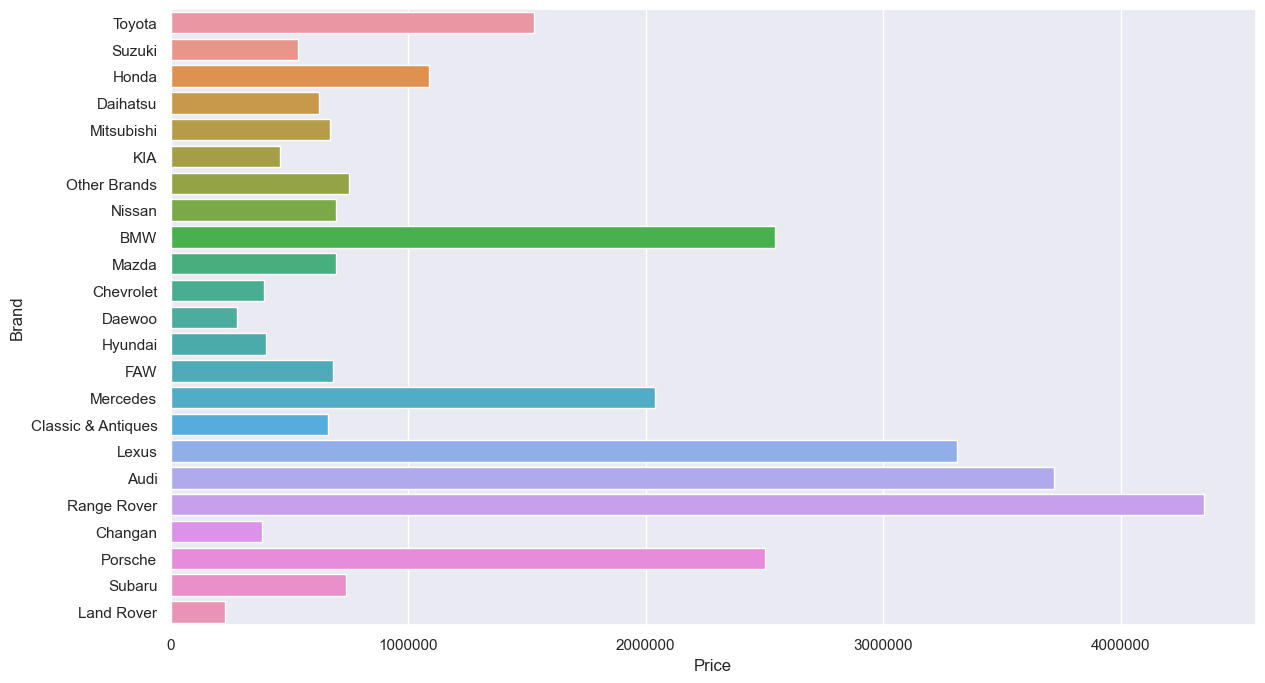

In [31]:
## Let's see the most Expensive Brand
plt.figure(figsize=(14,8))
sns.barplot(x='Price',y='Brand',data=df,errorbar=None)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

- So Range Rover is the most Expensive Brand followed by Audi and Lexus.

In [32]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1,Prado,2100000,Karachi,Cash,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,Karachi,Cash,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,Karachi,Cash,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,Karachi,Cash,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,Karachi,Cash,2013


In [33]:
## Let's Get the top 5 most popular models and Cities
popular = df[(df['Registered City'].isin(['Karachi','Lahore','Islamabad','Rawalpindi','Multan'])) & (df['Brand'].isin(['Suzuki','Toyota','Honda','Daihatsu','Nissan']))]
popular.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1,Prado,2100000,Karachi,Cash,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,Karachi,Cash,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,Karachi,Cash,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,Karachi,Cash,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,Karachi,Cash,2013


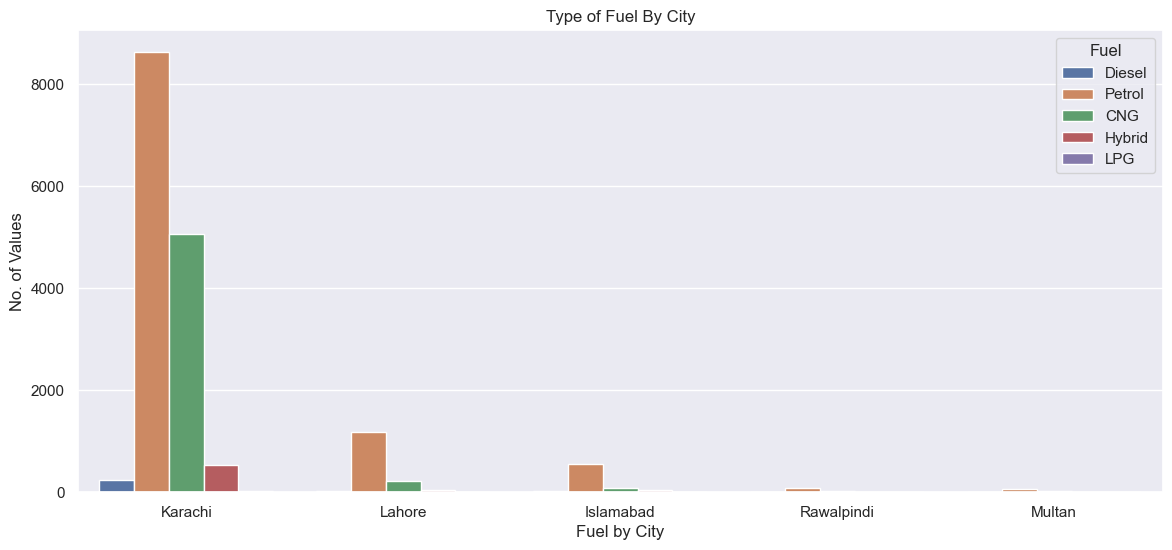

In [34]:
## Graph to Show the Fuel Type By City
plt.figure(figsize=(14,6))
sns.countplot(x='Registered City',data=popular,hue='Fuel')
plt.title('Type of Fuel By City')
plt.xlabel('Fuel by City')
plt.ylabel('No. of Values')
plt.show()

- So Paterol is most Used type of Fuel in poplar cities and CNG is used the most after Petrol.

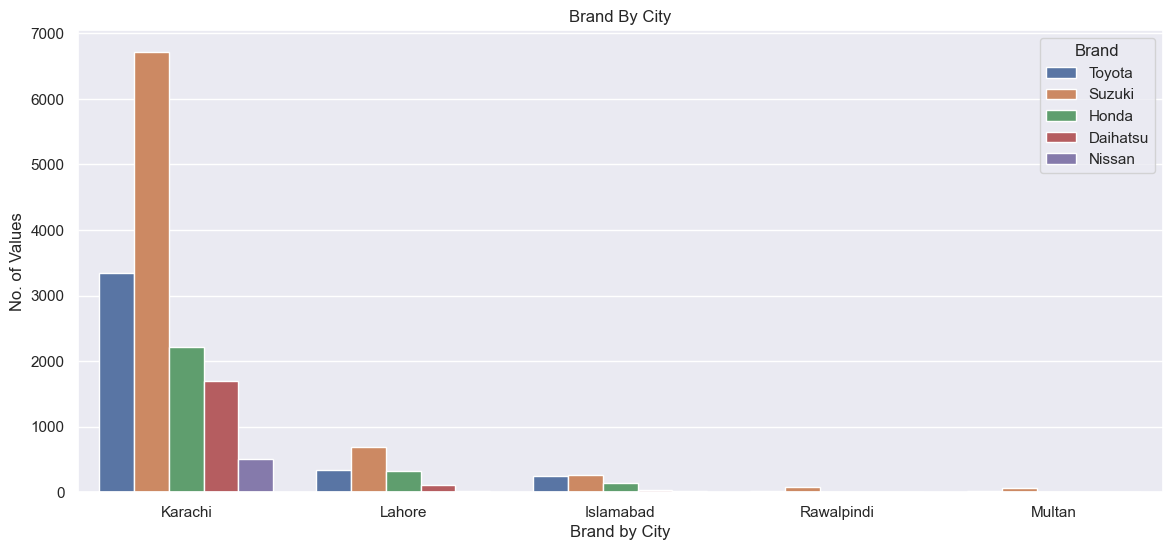

In [35]:
## Graph to Show the Brands By City
plt.figure(figsize=(14,6))
sns.countplot(x='Registered City',data=popular,hue='Brand')
plt.title('Brand By City')
plt.xlabel('Brand by City')
plt.ylabel('No. of Values')
plt.show()

- Suzuki is the most Popular Brand in most of the popular Cities.

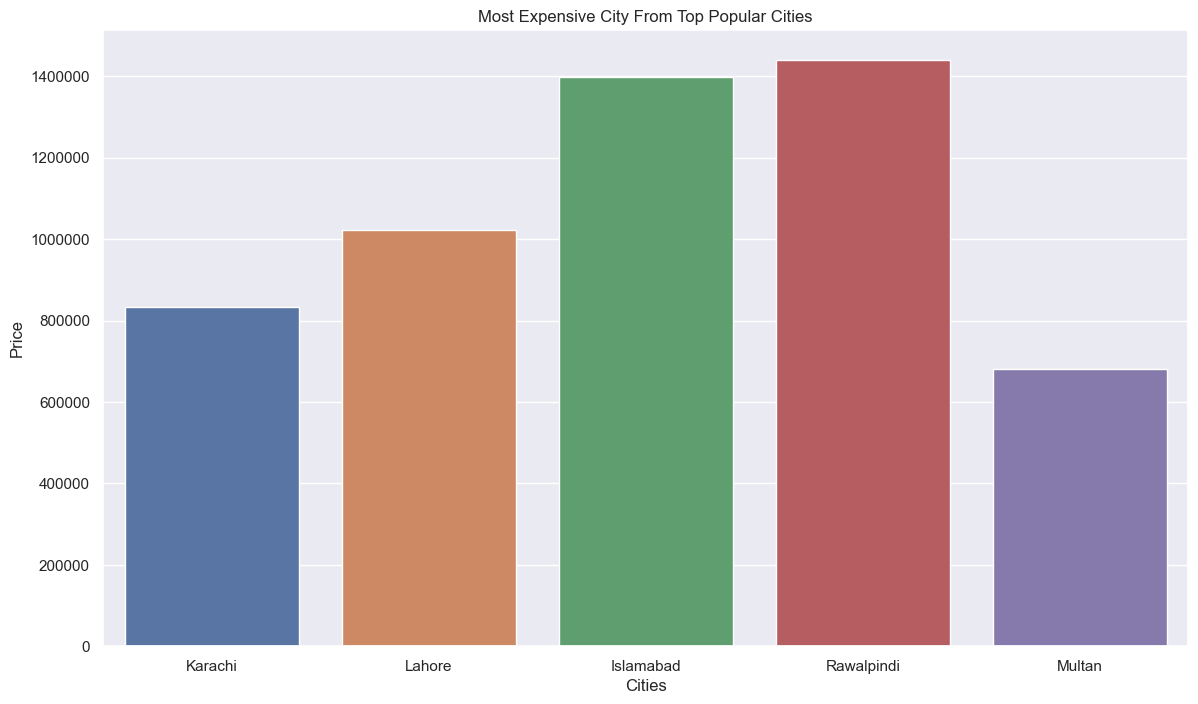

In [36]:
## Let's see the most Expensive City From Popular Cities
plt.figure(figsize=(14,8))
sns.barplot(x='Registered City',y='Price',data=popular,errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Most Expensive City From Top Popular Cities')
plt.xlabel('Cities')
plt.ylabel('Price')
plt.show()

- So Rawalpindi and Islamabad are the most expensive cities to buy cars

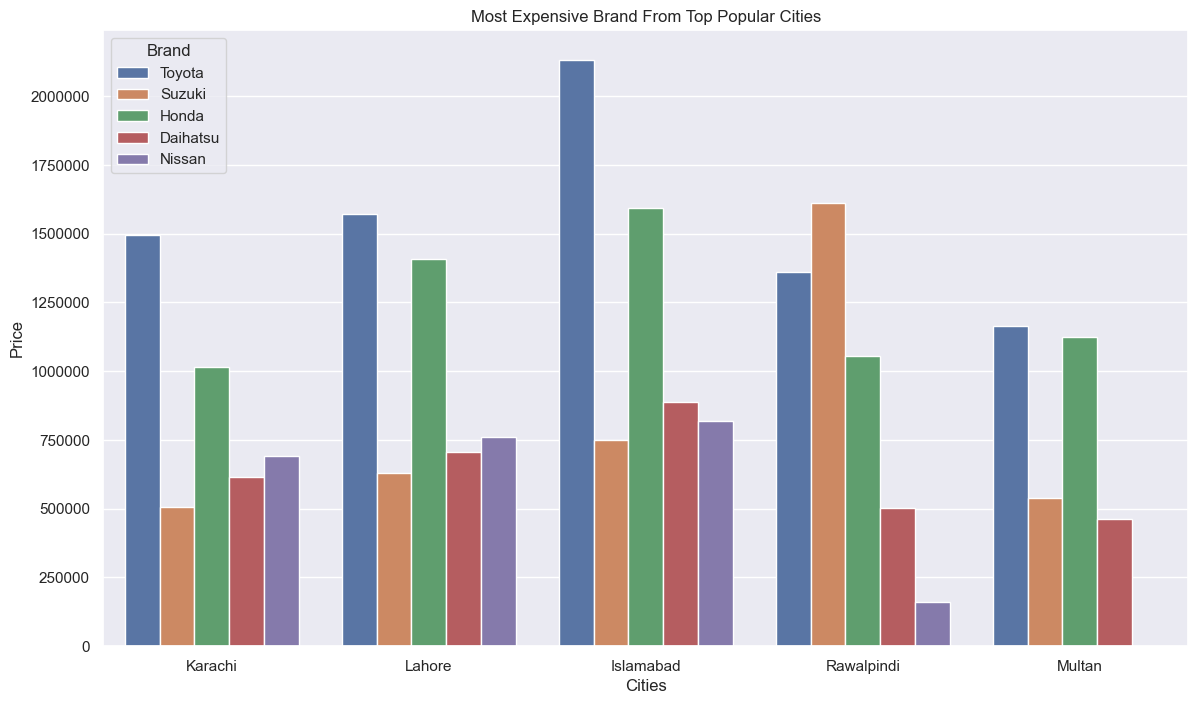

In [37]:
## Let's see the most Expensive Brand From Popular Cities
plt.figure(figsize=(14,8))
sns.barplot(x='Registered City',y='Price',hue='Brand',data=popular,errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Most Expensive Brand From Top Popular Cities')
plt.xlabel('Cities')
plt.ylabel('Price')
plt.show()

- So Toyota is the most expensive brand in Karachi, Lahore, Islamabad and Multan followed by Honda and suzuki is the most expensive brand is Rawalpindi based on popular cities and brands

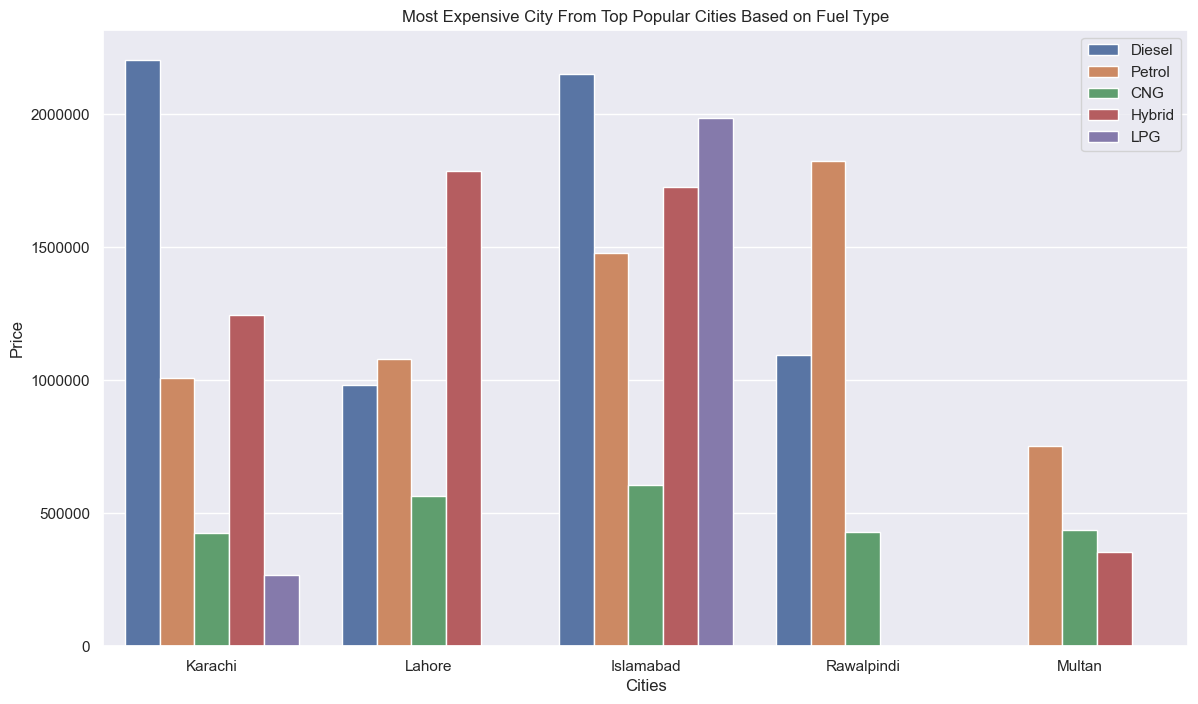

In [38]:
## Let's see the most Expensive City From Popular Cities Based on Fuel type
plt.figure(figsize=(14,8))
sns.barplot(x='Registered City',y='Price',hue='Fuel',data=popular,errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Most Expensive City From Top Popular Cities Based on Fuel Type')
plt.xlabel('Cities')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

- So Diesel is the most expensive fuel in Karachi and Islamabad

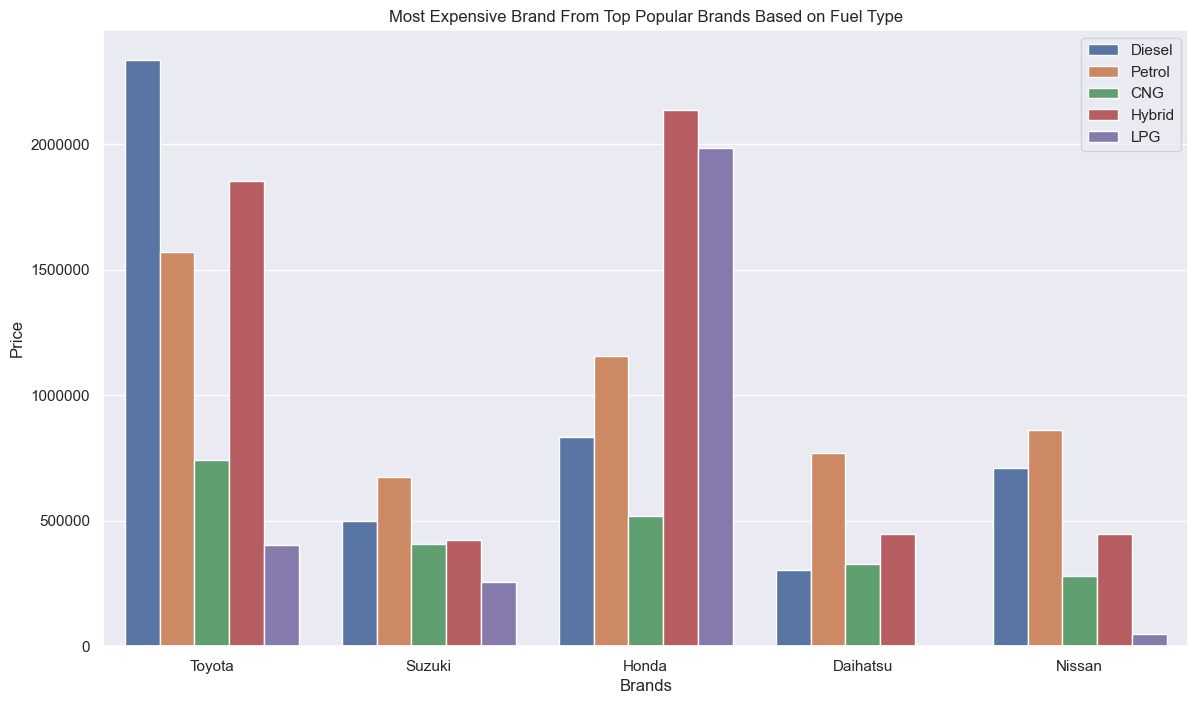

In [39]:
## Let's see the most Expensive City From Popular Cities Based on Fuel type
plt.figure(figsize=(14,8))
sns.barplot(x='Brand',y='Price',hue='Fuel',data=popular,errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Most Expensive Brand From Top Popular Brands Based on Fuel Type')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

- So Toyota is the most expensive Brand based on Fuel Type.

In [40]:
popular.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1,Prado,2100000,Karachi,Cash,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,Karachi,Cash,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,Karachi,Cash,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,Karachi,Cash,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,Karachi,Cash,2013


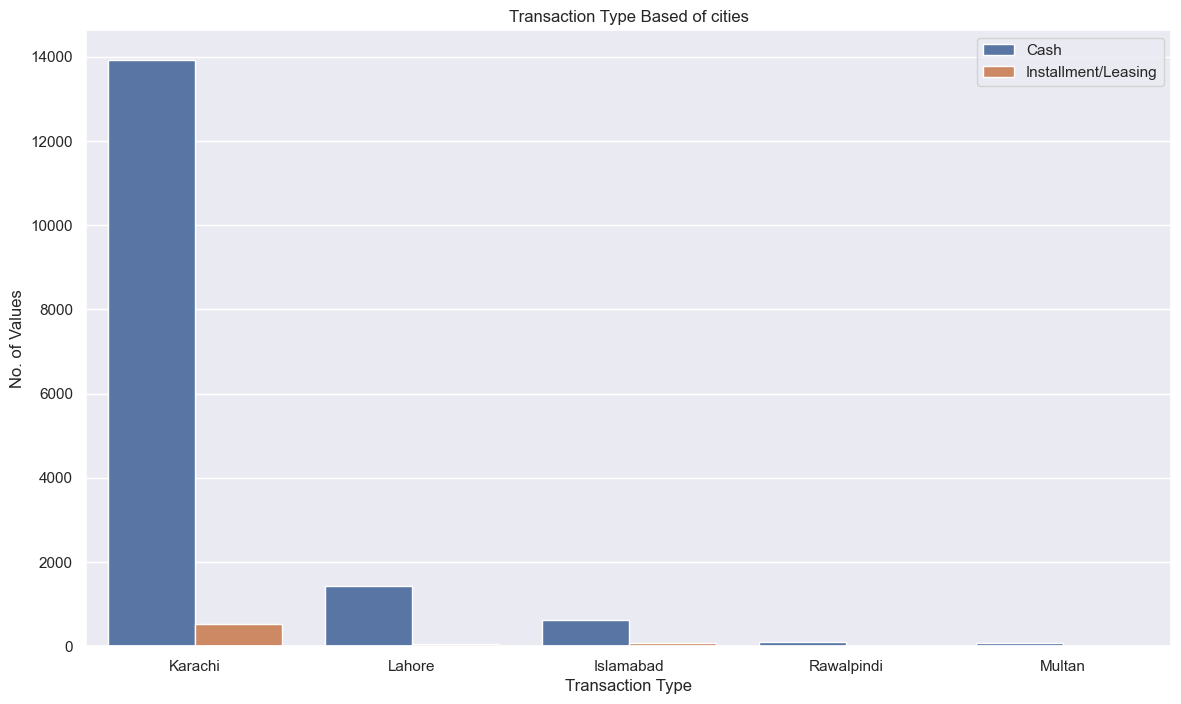

In [41]:
## Let's see the Transaction Type in popular cities
plt.figure(figsize=(14,8))
sns.countplot(x='Registered City',hue='Transaction Type',data=popular)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transaction Type Based of cities')
plt.xlabel('Transaction Type')
plt.ylabel('No. of Values')
plt.legend(loc='upper right')
plt.show()

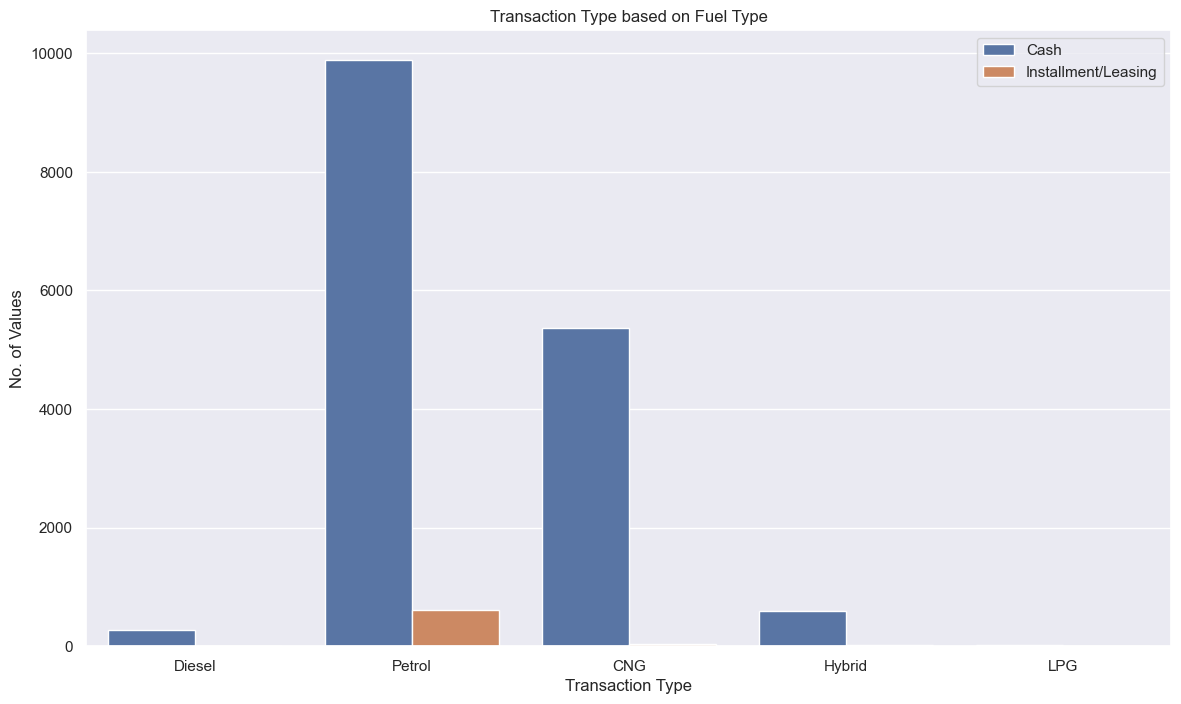

In [42]:
## Let's see the Transaction Type Based on fuel type
plt.figure(figsize=(14,8))
sns.countplot(x='Fuel',hue='Transaction Type',data=popular)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transaction Type based on Fuel Type')
plt.xlabel('Transaction Type')
plt.ylabel('No. of Values')
plt.legend(loc='upper right')
plt.show()

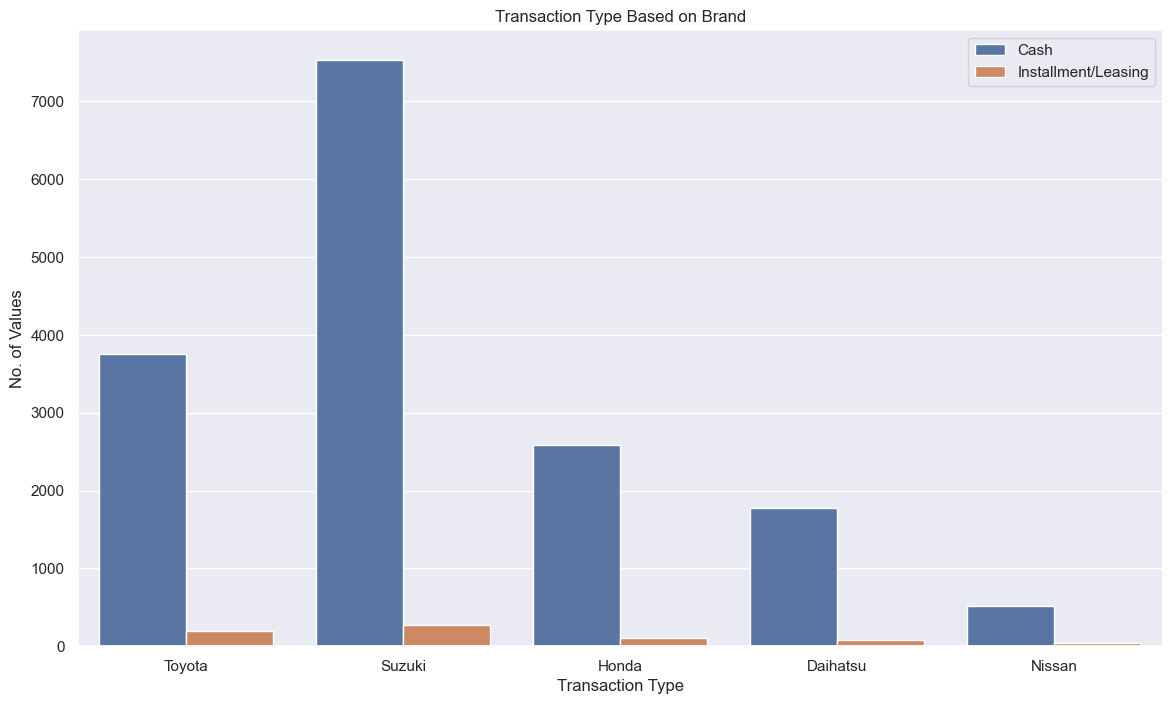

In [43]:
## Let's see the Transaction Type Based on Model
plt.figure(figsize=(14,8))
sns.countplot(x='Brand',hue='Transaction Type',data=popular)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Transaction Type Based on Brand')
plt.xlabel('Transaction Type')
plt.ylabel('No. of Values')
plt.legend(loc='upper right')
plt.show()

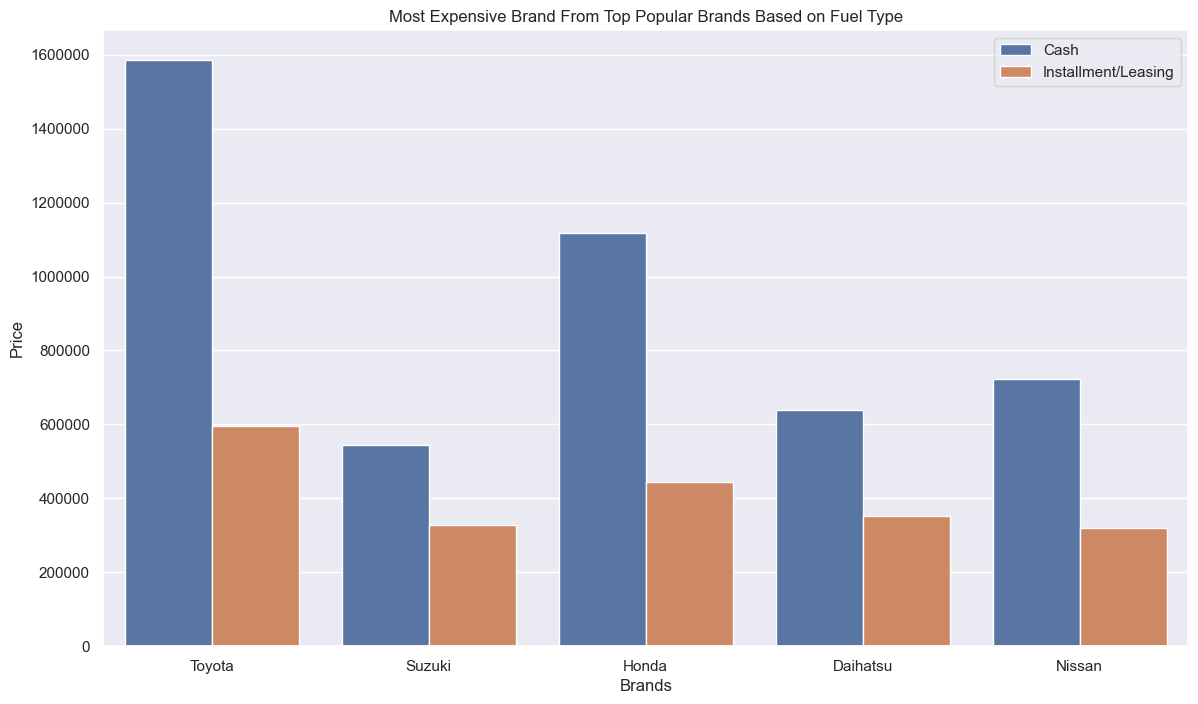

In [44]:
## Let's see the most Expensive City From Popular Cities Based on Fuel type
plt.figure(figsize=(14,8))
sns.barplot(x='Brand',y='Price',hue='Transaction Type',data=popular,errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Most Expensive Brand From Top Popular Brands Based on Fuel Type')
plt.xlabel('Brands')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

- So in popular Brands Transaction Type is mostly in Cash for higher Price.

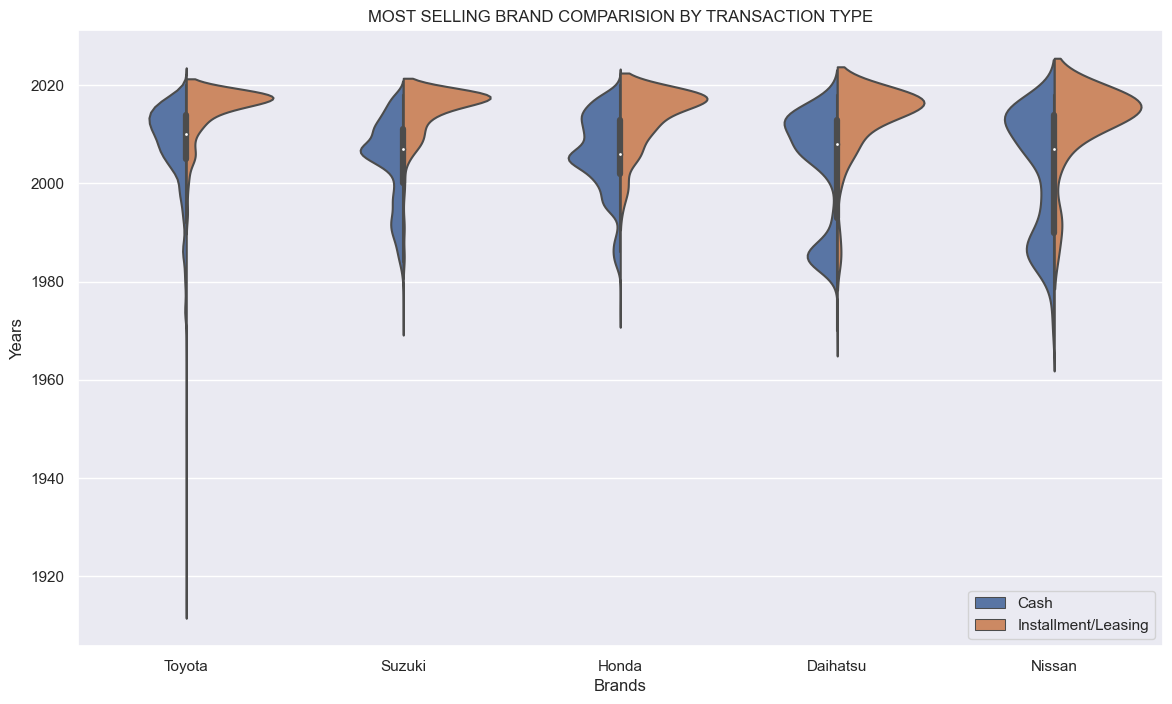

In [45]:
## Let's see the most Expensive City From Popular Cities Based on Fuel type
plt.figure(figsize=(14,8))
sns.violinplot(x='Brand',y='Year',hue='Transaction Type',data=popular,split=True)
plt.title('MOST SELLING BRAND COMPARISION BY TRANSACTION TYPE')
plt.xlabel('Brands')
plt.ylabel('Years')
plt.legend(loc='lower right')
plt.show()

- So in recent Years most of the brands allow Installment/Leasing Transaction Type.

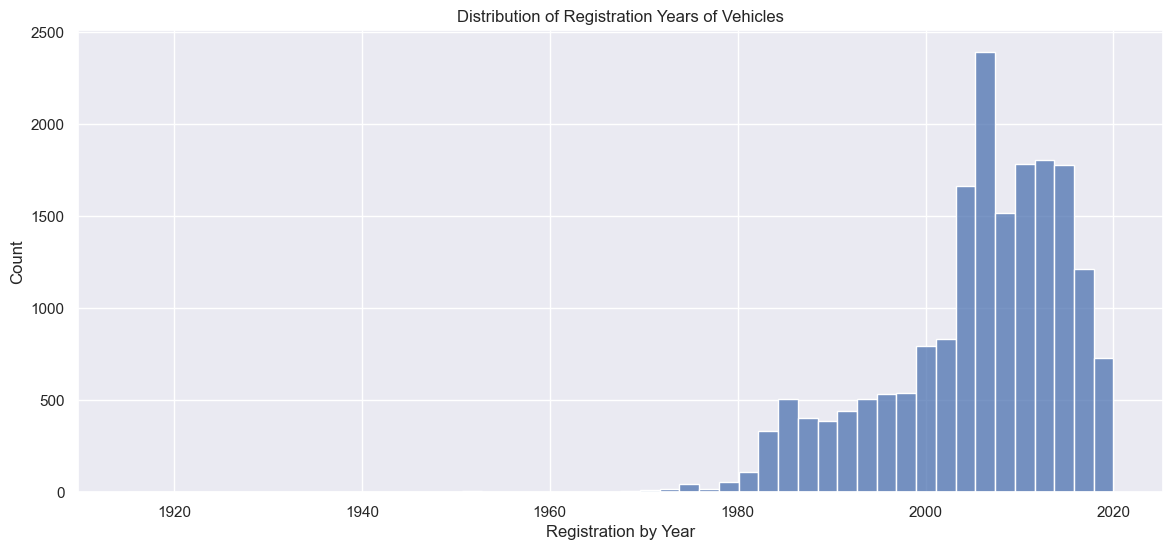

In [46]:
plt.figure(figsize=(14,6))
sns.histplot(df['Year'],bins=50)
plt.title("Distribution of Registration Years of Vehicles")
plt.xlabel("Registration by Year")
plt.show()

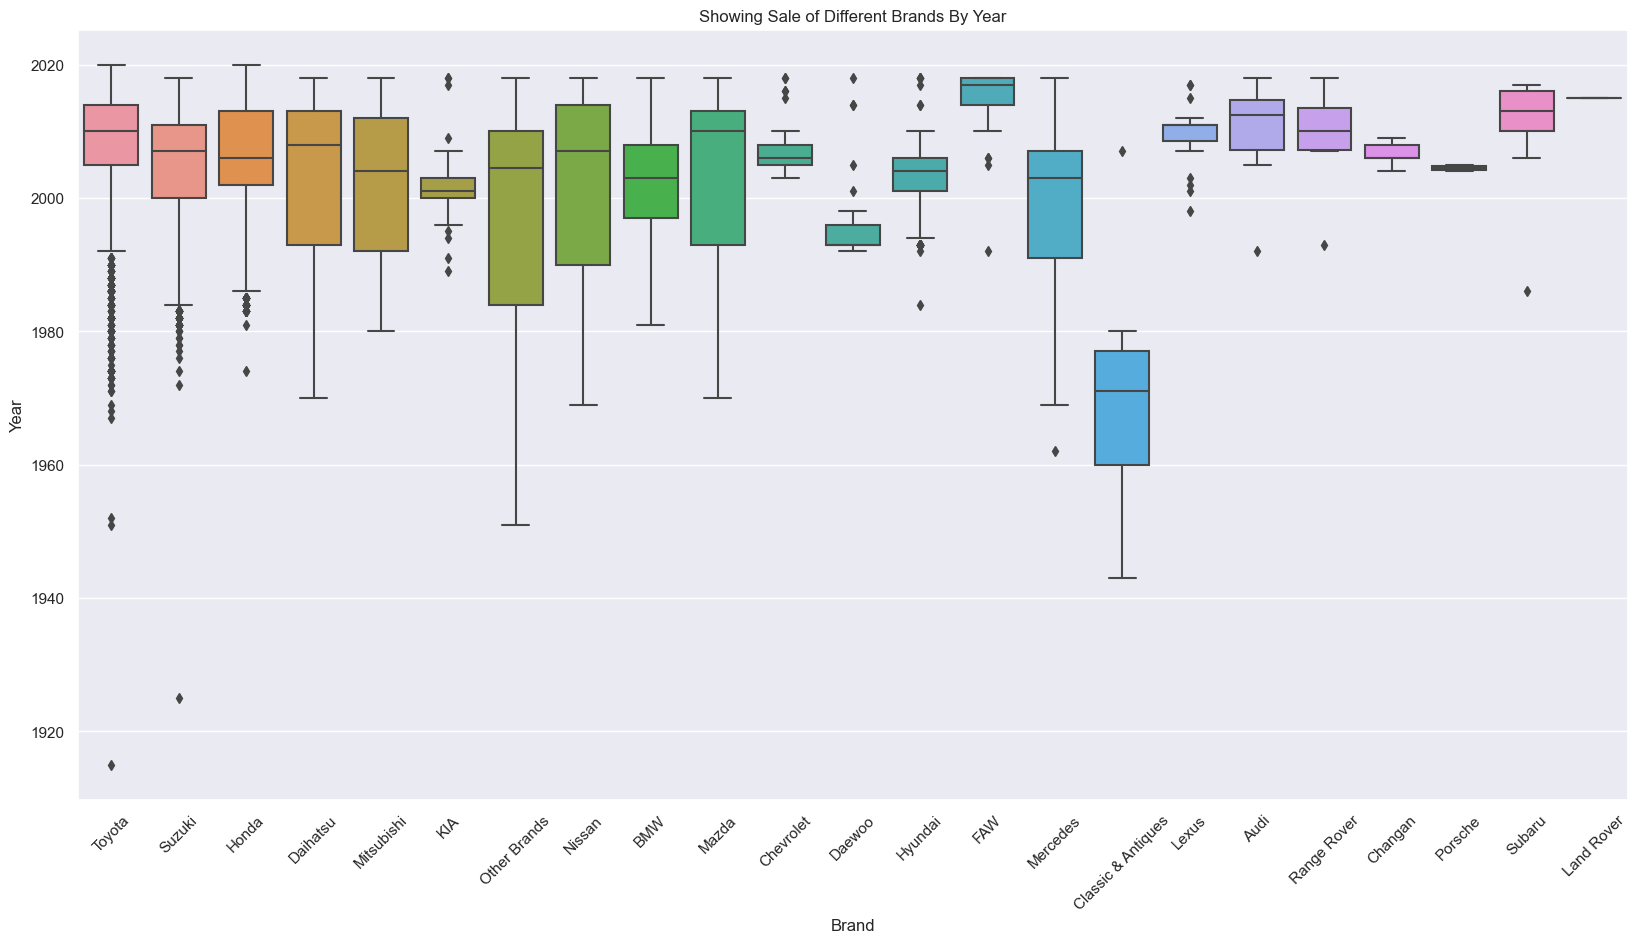

In [47]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Brand',y='Year',data=df,width=0.8)
plt.title("Showing Sale of Different Brands By Year")
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x1000 with 0 Axes>

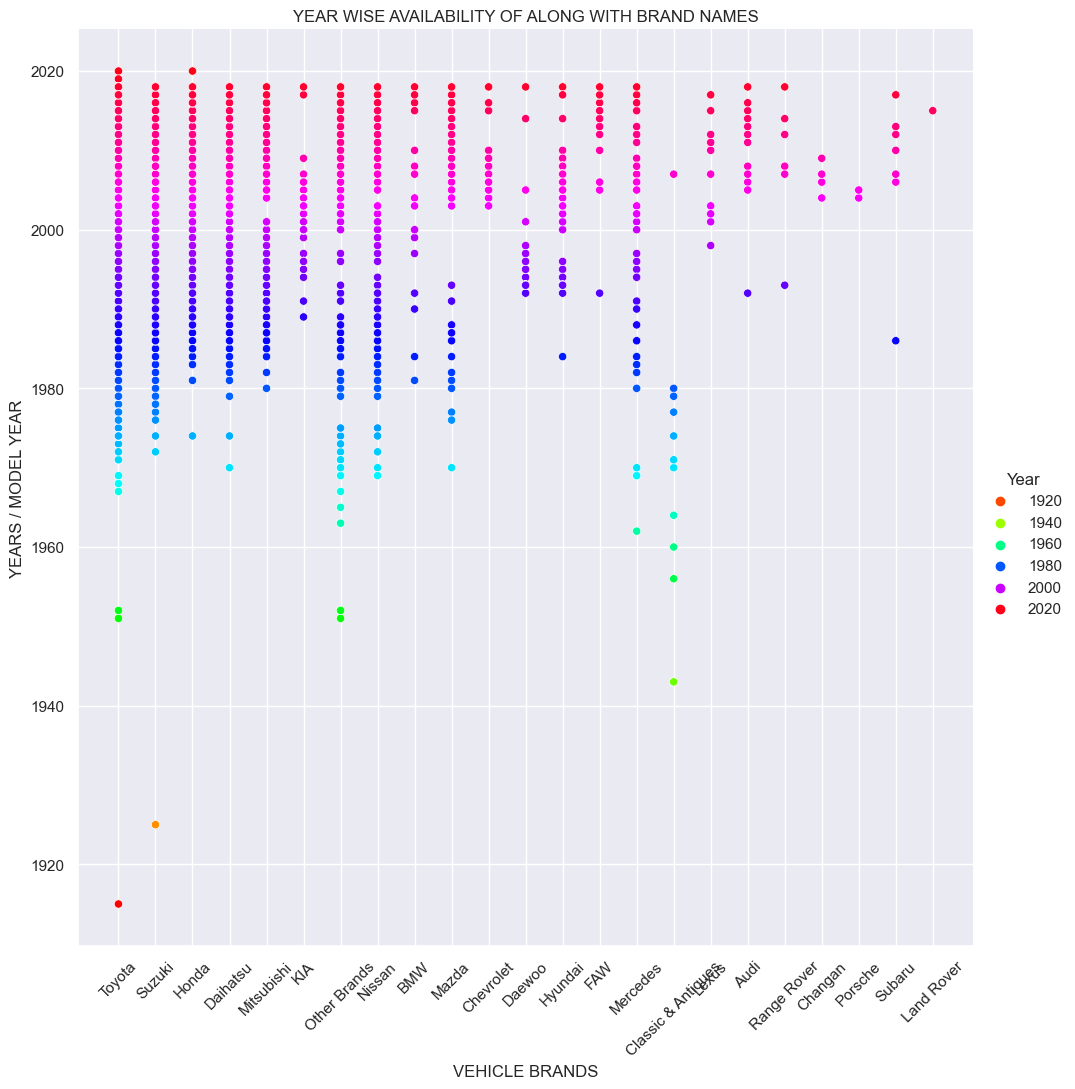

In [48]:
plt.figure(figsize=(18,10))
sns.relplot(data = df, x = 'Brand', y = 'Year', hue = 'Year', palette = 'hsv', height = 10, alpha = 1)
plt.title("YEAR WISE AVAILABILITY OF ALONG WITH BRAND NAMES")
plt.ylabel("YEARS / MODEL YEAR")
plt.xlabel("VEHICLE BRANDS")
plt.xticks(rotation = 45)
plt.show()

- The above plot is expressing how many year's registered vehicle are available for the sale the data is showing as we have very less vehicles for the year 2020 whereas most of the vehicles are fall under year 2005 to 2010